In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_theme(style="darkgrid")

In [2]:
customers = pd.read_csv('Customer.csv', parse_dates=[1], infer_datetime_format=True)
transactions = pd.read_csv('Transactions.csv', parse_dates=[2], infer_datetime_format=True)
prod_cat = pd.read_csv('prod_cat_info.csv')

In [3]:
# Creating the final table
customer_final = transactions.merge(customers, left_on='cust_id', right_on='customer_Id').drop(['cust_id'], axis=1).merge(prod_cat, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code']).drop('prod_sub_cat_code', axis=1)

# Ensuring we have all the transactions
customer_final.shape[0] == transactions.shape[0]

True

In [4]:
customer_final.head()

,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women
1,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women
2,18505840838,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,Women
3,92814475704,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,Women
4,92814475704,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,Women


# summary report

In [5]:
customer_final.dtypes

transaction_id               int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
prod_cat                    object
prod_subcat                 object
dtype: object

In [6]:
customer_final.head(10)

,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women
1,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,270351,1981-09-26,M,5.0,Clothing,Women
2,18505840838,2013-12-16,1,1,3,1229,387.135,4074.135,Flagship store,271509,1981-08-06,M,3.0,Clothing,Women
3,92814475704,2013-08-16,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,Women
4,92814475704,2013-07-08,1,1,4,284,119.280,1255.280,Flagship store,267750,1986-10-13,M,1.0,Clothing,Women
5,4737317330,2011-07-29,1,1,5,1141,599.025,6304.025,MBR,269345,1970-06-26,F,10.0,Clothing,Women
6,44425889101,2012-03-18,1,1,4,897,376.740,3964.740,Flagship store,274987,1983-08-10,M,2.0,Clothing,Women
7,90501340928,2012-02-19,1,1,1,1122,117.810,1239.810,TeleShop,271817,1989-12-24,M,8.0,Clothing,Women
8,99335419136,2012-12-13,1,1,3,1181,372.015,3915.015,e-Shop,268755,1984-07-15,F,8.0,Clothing,Women
9,35030444164,2011-11-18,1,1,5,1047,549.675,5784.675,MBR,268129,1982-07-08,F,9.0,Clothing,Women


In [7]:
customer_final.tail(10)

,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,2011-07-15,4,4,1,388,40.740,428.740,e-Shop,269114,1989-01-22,F,5.0,Bags,Women
23044,76906459516,2011-06-15,4,4,2,1263,265.230,2791.230,Flagship store,267940,1979-09-06,M,9.0,Bags,Women
23045,73549617163,2011-05-07,4,4,5,263,138.075,1453.075,e-Shop,271334,1983-08-12,F,10.0,Bags,Women
23046,75339646315,2011-02-05,4,4,4,1381,580.020,6104.020,e-Shop,274827,1988-12-27,F,8.0,Bags,Women
23047,6650926717,2011-05-04,4,4,4,1036,435.120,4579.120,MBR,268110,1976-06-03,M,2.0,Bags,Women
23048,7173864364,2011-09-04,4,4,5,788,413.700,4353.700,Flagship store,271157,1973-10-15,F,6.0,Bags,Women
23049,5618131425,2011-03-03,4,4,2,1150,241.500,2541.500,MBR,272010,1972-12-22,F,5.0,Bags,Women
23050,18727956164,2011-02-23,4,4,5,668,350.700,3690.700,e-Shop,267161,1981-08-05,M,9.0,Bags,Women
23051,60416814232,2011-02-18,4,4,4,202,84.840,892.840,Flagship store,273281,1988-12-14,F,9.0,Bags,Women
23052,83245680995,2011-01-26,4,4,4,1477,620.340,6528.340,e-Shop,273723,1984-01-21,F,4.0,Bags,Women


In [8]:
customer_final.describe().drop(customer_final.describe().index[:3])[['Qty', 'Rate', 'Tax', 'total_amt']]

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.350,-8270.925
25%,1.0,312.0,98.280,762.450
50%,3.0,710.0,199.080,1754.740
75%,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


In [9]:
customer_final[customer_final.select_dtypes(include=object).columns.values] = customer_final[customer_final.select_dtypes(include=object).columns.values].astype("category") 

In [10]:
cat_df = customer_final.select_dtypes(include='category')

In [11]:
customer_final.select_dtypes(include='category').nunique()

Store_type      4
Gender          2
prod_cat        6
prod_subcat    18
dtype: int64

In [12]:
cat_df

,Store_type,Gender,prod_cat,prod_subcat
0,e-Shop,M,Clothing,Women
1,e-Shop,M,Clothing,Women
2,Flagship store,M,Clothing,Women
3,Flagship store,M,Clothing,Women
4,Flagship store,M,Clothing,Women
...,...,...,...,...
23048,Flagship store,F,Bags,Women
23049,MBR,F,Bags,Women
23050,e-Shop,M,Bags,Women
23051,Flagship store,F,Bags,Women


##  Generate histograms for all continuous variables and frequency bars for categorical variables

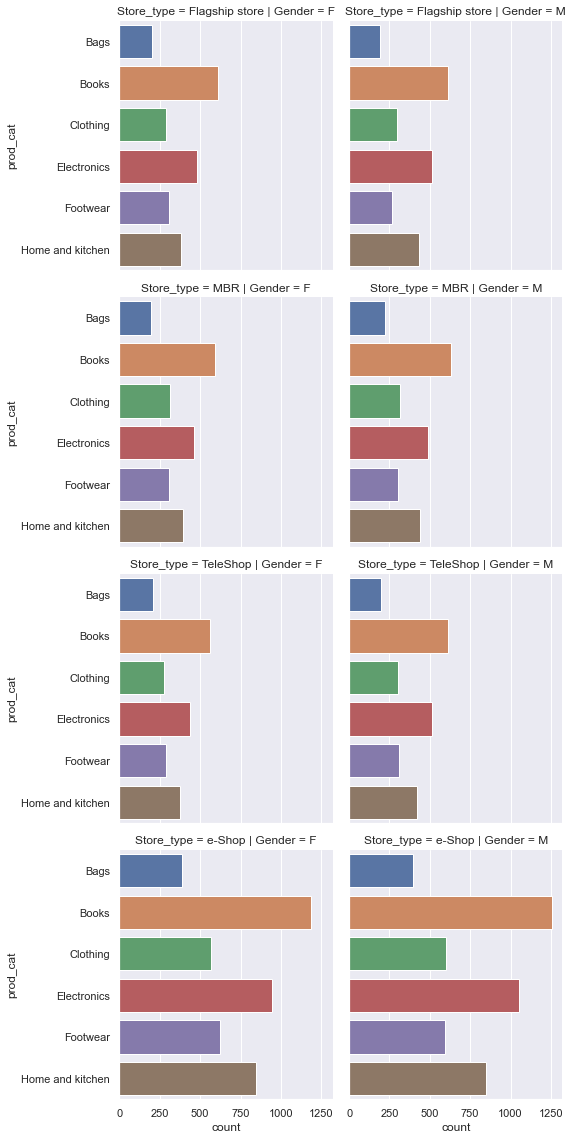

In [13]:
g = sns.catplot(y="prod_cat", col="Gender", row="Store_type",
                data=cat_df, kind="count", legend_out=True, 
                height=4, aspect=1);
g = g.add_legend()
plt.show()

In [14]:
plot=cat_df.groupby(['Store_type', 'prod_cat', 'prod_subcat', 'Gender']).size().reset_index(name="Count")
plot = plot[plot.Count > 0]
plot

,Store_type,prod_cat,prod_subcat,Gender,Count
24,Flagship store,Bags,Mens,F,90
25,Flagship store,Bags,Mens,M,103
34,Flagship store,Bags,Women,F,110
35,Flagship store,Bags,Women,M,86
36,Flagship store,Books,Academic,F,111
...,...,...,...,...,...
847,e-Shop,Home and kitchen,Furnishing,M,213
850,e-Shop,Home and kitchen,Kitchen,F,198
851,e-Shop,Home and kitchen,Kitchen,M,202
860,e-Shop,Home and kitchen,Tools,F,237


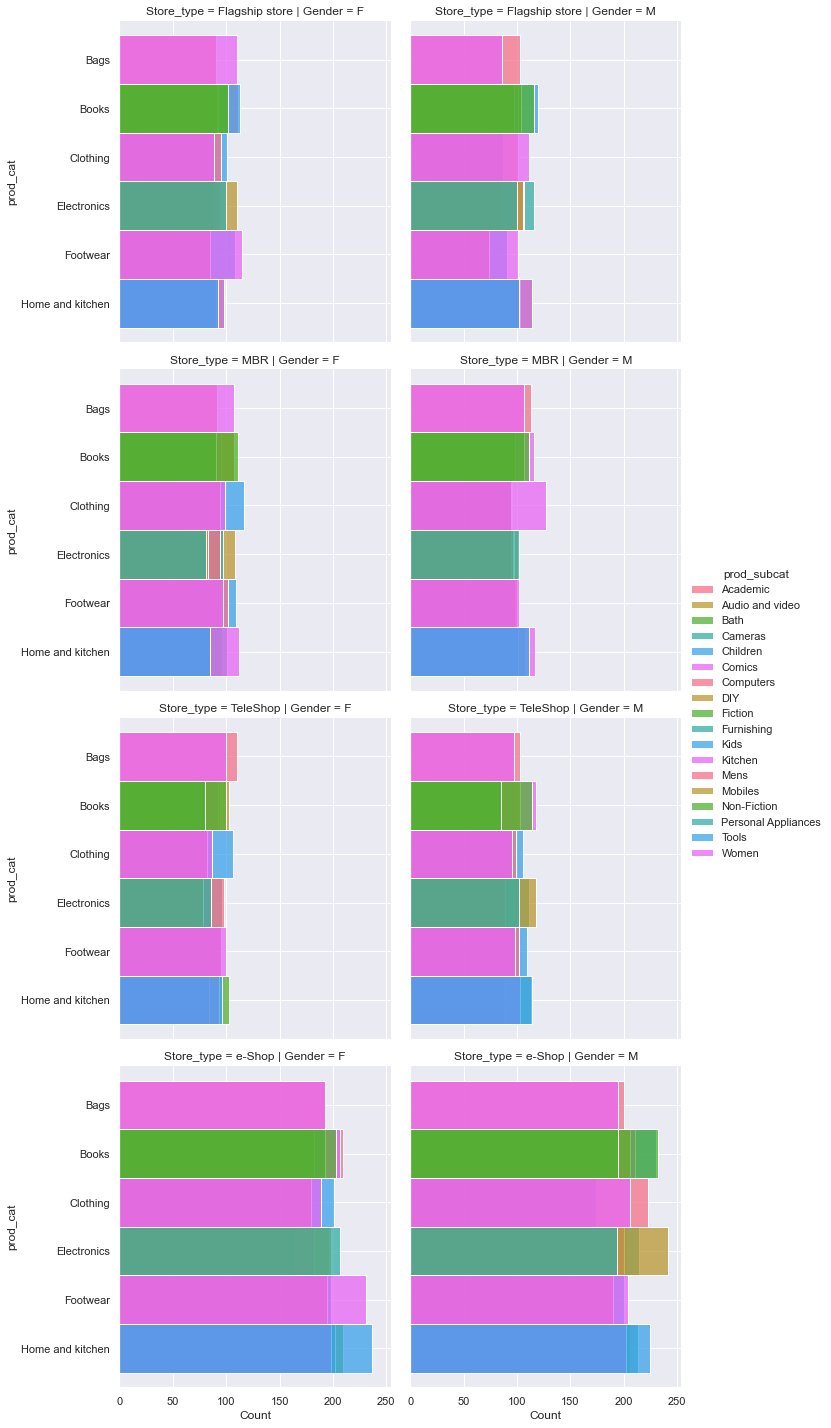

In [15]:
g = sns.FacetGrid(plot, col="Gender", row="Store_type", hue="prod_subcat", palette=sns.color_palette("husl"), height=5, aspect=1, legend_out=True)
g = (g.map_dataframe(sns.histplot, y="prod_cat", weights="Count", multiple='stack', data=plot)).add_legend()
plt.show()

## Time period of the Transaction data

In [16]:
(customer_final.tran_date.max()-customer_final.tran_date.min()).days

1430

###### Looks like there are 2177 refunds

In [129]:
customer_final[customer_final.total_amt < 0].shape[0]

2177

##  Product categories popularity among females vs male

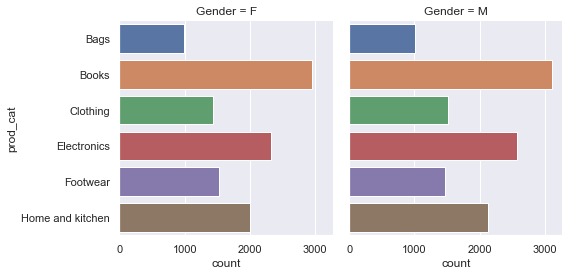

In [17]:
g = sns.catplot(y="prod_cat", col="Gender",
                data=cat_df, kind="count", legend_out=True, 
                height=4, aspect=1);
g = g.add_legend()
plt.show()

## City code with maximum customers by %

In [137]:
customer_final.groupby('city_code').size().sort_values(ascending=False).div(customer_final.groupby('city_code').size().sort_values(ascending=False).sum())*100

city_code
4.0     10.509872
3.0     10.462139
5.0     10.240833
7.0     10.223476
10.0    10.123671
8.0     10.110653
2.0      9.850293
1.0      9.798221
9.0      9.451074
6.0      9.229768
dtype: float64

## Store type sells the maximum products by value and by quantity

In [18]:
customer_final.groupby('city_code').size().sort_values(ascending=False).sum()

23045

In [19]:
customer_final.groupby('Store_type')['total_amt'].sum()

Store_type
Flagship store    9.715688e+06
MBR               9.674486e+06
TeleShop          9.364781e+06
e-Shop            1.982482e+07
Name: total_amt, dtype: float64

In [20]:
customer_final.groupby('Store_type').size()

Store_type
Flagship store    4577
MBR               4661
TeleShop          4504
e-Shop            9311
dtype: int64

##  Total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores

In [152]:
customer_final[(customer_final['Store_type'] == 'Flagship store')&(customer_final['prod_cat'].isin(['Electronics', 'Books']))].total_amt.sum()

4703341.890000001

## Total amount earned from "Male" customers under the "Electronics" category?

In [155]:
customer_final[(customer_final['Gender'] == 'M')&(customer_final['prod_cat']=='Electronics')].total_amt.sum()

5703109.425000001

## Customers have more than 10 unique transactions, after removing all transactions which have any negative amounts

In [159]:
p=customer_final[customer_final.total_amt > 0].groupby('customer_Id').size()
p[p>10]

customer_Id
266794    11
270535    11
270803    11
272741    11
273014    11
274227    11
dtype: int64

##  For all customers aged between 25 - 35:

In [31]:
y=dt.datetime.today().year-customer_final.DOB.apply(lambda x: x.year)

In [32]:
yt=~(customer_final.DOB.apply(lambda x: x.month)<dt.datetime.today().month)|((customer_final.DOB.apply(lambda x: x.month)==dt.datetime.today().month)&(customer_final.DOB.apply(lambda x: x.day)<=dt.datetime.today().day))

In [37]:
customer_final['Age'] = y-yt
df=customer_final[(customer_final.Age >= 25) & (customer_final.Age <= 35)]

In [40]:
df.prod_cat.value_counts()

Books               1611
Electronics         1314
Home and kitchen    1123
Footwear             828
Clothing             826
Bags                 512
Name: prod_cat, dtype: int64

## Total amount spent for “Electronics” and “Books” product categories

In [45]:
df[(df.prod_cat=='Electronics')|(df.prod_cat=='Books')].total_amt.sum()

6058003.38

## Total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014

In [53]:
df[(df.tran_date>=dt.datetime(2014,1,1))&(df.tran_date<=dt.datetime(2014,3,1))].total_amt.sum()

428230.595